### Describing a network

 - Centrality
     - Degree: number of connections
     - betweenness: number of shortest paths from all nodes to all others that pass through a particular node
     - closeness: average length of the shortest paths between a specific node and all other nodes in the graph

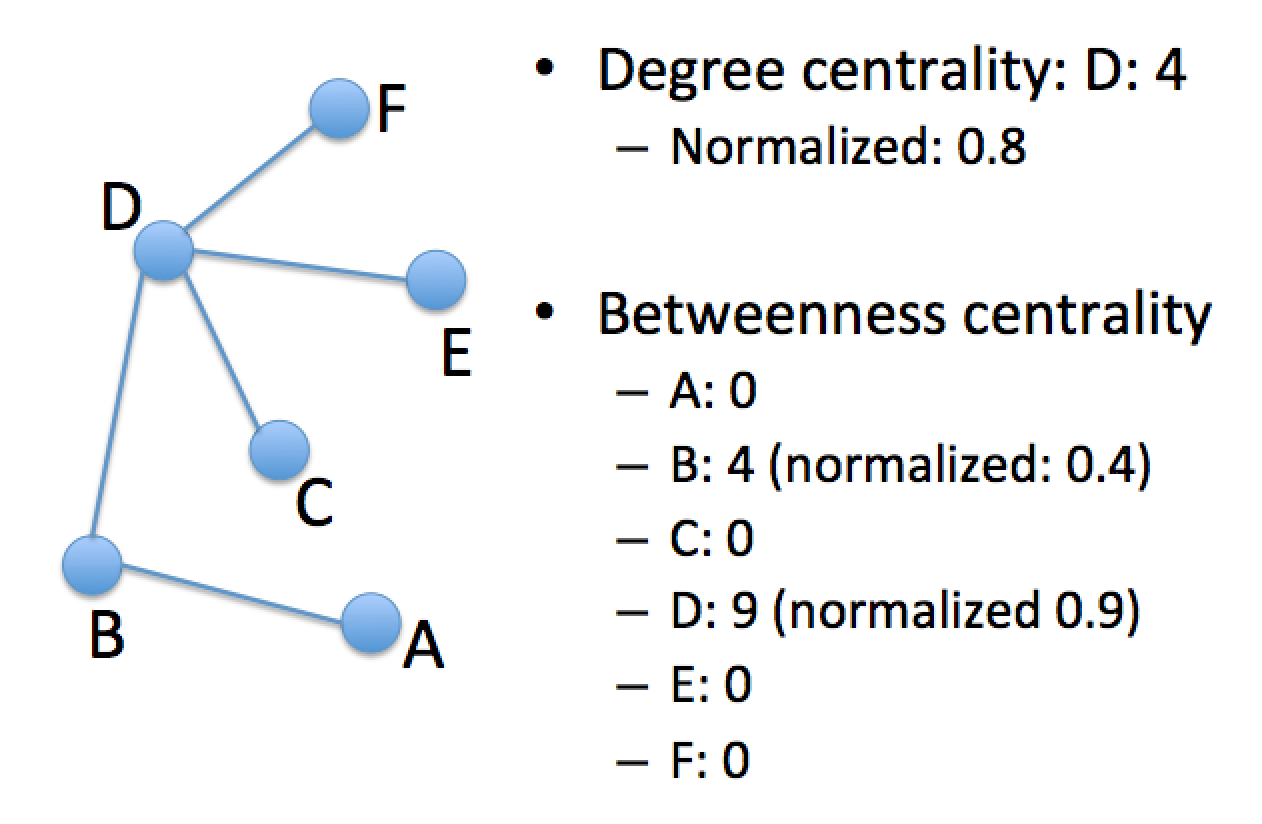

In [75]:
from IPython.display import Image, display
# Degree Centrality + betweenness centrality
Image("images/centrality1.png", width=600)

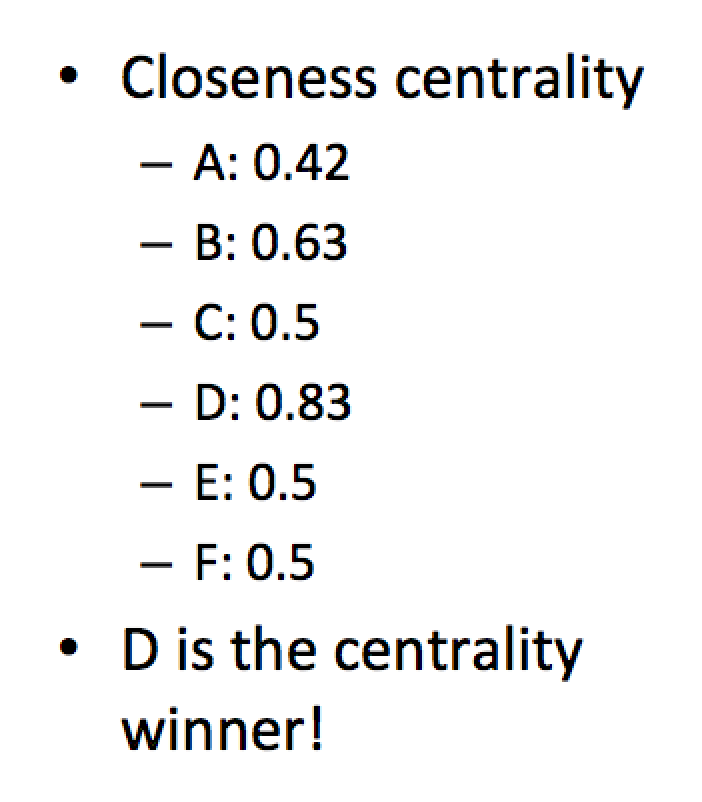

In [78]:
# Degree Centrality + betweenness centrality
Image("images/centrality2.png", width=400)

In [87]:
import networkx as nx
import json

In [97]:
f = open("datasets/twitter/friends/list.PyTennessee.json")
data = json.load(f)
pairs = []

for user in data['users']:
    pairs.append(('PyTennessee', str(user['screen_name'])))

pairs[:10]

[('PyTennessee', 'LampPostGroup'),
 ('PyTennessee', 'octovisinc'),
 ('PyTennessee', 'nashdevcal'),
 ('PyTennessee', 'hsvpy'),
 ('PyTennessee', 'bvalentine615'),
 ('PyTennessee', 'awebneck'),
 ('PyTennessee', 'ascot21'),
 ('PyTennessee', 'pyohio'),
 ('PyTennessee', 'CalEvans'),
 ('PyTennessee', 'nodevember')]

In [102]:

# Because the relationship data is split across files, we need to
# walk through all of them to get the data.
import os

for (dir_path, dir_names, file_names) in os.walk('datasets/twitter/friend_relationships/'):
    files = file_names
    
for file_name in files:
    with open('datasets/twitter/friend_relationships/' + file_name) as p:
        pair_data = json.load(p)
        for k in pair_data.keys():
            twitter_pair = k.split()
            if pair_data[k]['relationship']['source']['following'] is True:
                pairs.append((str(twitter_pair[0]), str(twitter_pair[1])))
            elif pair_data[k]['relationship']['source']['followed_by'] is True:
                pairs.append((str(twitter_pair[1]), str(twitter_pair[0])))
                
len(pairs)

1286

In [107]:
# undirected graph
G = nx.Graph()
G.add_edges_from(pairs)

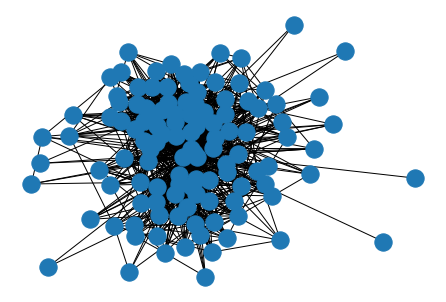

In [110]:
nx.draw(G)

In [109]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 117\nNumber of edges: 1286\nAverage degree:  21.9829'

In [167]:
def centrality_sort(centrality_dict):
    return sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)

In [172]:
# nodes with the highest/lowest degree centrality
degree_centrality = nx.degree_centrality(G)
degree_sorted = centrality_sort(degree_centrality)

In [183]:
degree_sorted[-20:]

[('adamfblahblah', 0.06896551724137931),
 ('rubybuddha', 0.06896551724137931),
 ('GitHubCommunity', 0.06034482758620689),
 ('pyrsonwho', 0.06034482758620689),
 ('mozilla', 0.06034482758620689),
 ('LampPostGroup', 0.05172413793103448),
 ('pycharm', 0.05172413793103448),
 ('toranb', 0.05172413793103448),
 ('pragprog', 0.05172413793103448),
 ('adafruit', 0.04310344827586207),
 ('JuiceAnalytics', 0.04310344827586207),
 ('InformIT', 0.034482758620689655),
 ('jetbrains', 0.034482758620689655),
 ('studionow', 0.034482758620689655),
 ('SurveyMonkey', 0.02586206896551724),
 ('MosaikGlobal', 0.017241379310344827),
 ('Spotify', 0.017241379310344827),
 ('NashGeekJam', 0.017241379310344827),
 ('whitacre', 0.008620689655172414),
 ('thefeatures', 0.008620689655172414)]

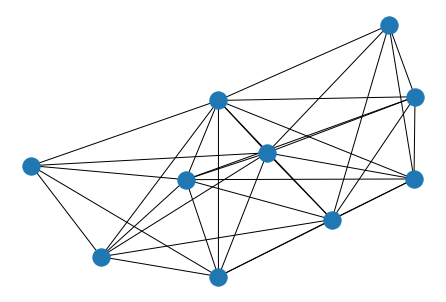

In [188]:
highest_degree = [node[0] for node in degree_sorted][:10]
sub = G.subgraph(highest_degree)
nx.draw(sub)

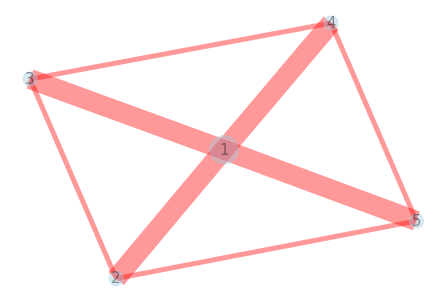

In [208]:
g = nx.Graph()

# let's attach a size attribute to each node to describe how big we want the node to be
g.add_node(1, size = 800)
g.add_node(2, size = 200)
g.add_node(3, size = 200)
g.add_node(4, size = 200)
g.add_node(5, size = 200)

g.add_edge(1,2, thickness = 20)
g.add_edge(1,3, thickness = 20)
g.add_edge(1,4, thickness = 20)
g.add_edge(1,5, thickness = 20)
g.add_edge(2,3, thickness = 5)
g.add_edge(3,4, thickness = 5)
g.add_edge(4,5, thickness = 5)
g.add_edge(5,2, thickness = 5)

# # let's iterate through the nodes and edges and extract the list of node & edge sizes
node_size = [attribs['size'] for (node, attribs) in g.nodes(data=True)]
edge_thickness = [attribs['thickness'] for (v_from, v_to, attribs) in g.edges(data=True)]

LIGHT_BLUE = '#A0CBE2'

nx.draw(g, 
    node_size = node_size,   # node_size can either take a single value (where all nodes will be size N),
                             # or a list of values, where Nth list value will be the size for the Nth node
    width = edge_thickness,  # similarly, the Nth value corresponds to the width for edge N
    node_color = LIGHT_BLUE,
    edge_color = "red",
    alpha=.4,
    font_size = 15,
    with_labels = True
)

In [211]:
edgelist_txt = 'datasets/twitter/retweets.txt'
G = nx.read_edgelist(edgelist_txt, create_using=nx.DiGraph())

['PyTennessee']


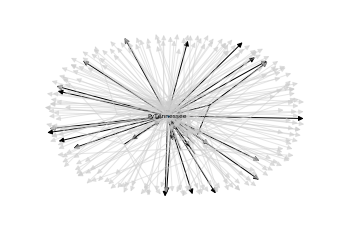

In [212]:
LAYOUTS = {
    'circular': nx.circular_layout,
    'fr': nx.fruchterman_reingold_layout,
    'random': nx.random_layout,
    'shell': nx.shell_layout,
    'spectral': nx.spectral_layout,
    'spring': nx.spring_layout
}

def save_layout(G, layout_name):
    elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >1.5]
    esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=1.5]
    nlarge=[n for n in G.nodes() if n in ['PyTennessee']]
    pos=LAYOUTS[layout_name](G) # positions for all nodes

    print (nlarge)
    # nodes
    nx.draw_networkx_nodes(G,pos,nodelist=nlarge,node_size=1)

    # edges
    nx.draw_networkx_edges(G,pos,edgelist=elarge, width=1)
    nx.draw_networkx_edges(G,pos,edgelist=esmall, width=1,alpha=0.5,edge_color='#cccccc')

    # labelsM
    labels={}
    labels['PyTennessee']='PyTennessee'
    nx.draw_networkx_labels(G,pos,labels,font_size=6)
    #nx.draw_networkx_labels(G,pos,nodelist=nlarge,font_size=6,font_family='sans-serif')

    plt.axis('off')
    plt.savefig(layout_name + '.png', dpi=500)

save_layout(G, 'spring')